In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [98]:
sns.set()
%config InlineBackend.figure_format = 'retina'
pd.set_option("display.precision", 2)

Загрузим исходный датасет. Загружать будем из внешнего источника - Google Таблицы.

In [99]:
netflix_sub_fee = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSOJIpYmzdiVzfgeK7o2aCPSm79dLbzyBe-R_0VAq8t1vPQVNtdpoys5DqV9Gv9kiTQL4Jei95IWQ-9/pub?output=csv"
data = pd.read_csv(netflix_sub_fee)
data["Country"] = data["Country"].astype(str)

In [100]:
data

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,us,United States,5818,3826,1992,8.99,13.99,17.99
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99


### 1. Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны

In [191]:
df_ppp = pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2021/October/weo-report?c=512,914,612,171,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=PPPPC,&sy=2021&ey=2021&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1")[0]

Преобразуем к более корректному виду. При этом оставим только оценку World Bank

In [192]:
df_ppp = pd.concat([df_ppp["Country"], df_ppp["2021"]], axis = 1)
df_ppp.rename(columns = {"2021": "PPP"}, inplace = True)

В большинстве задач в данном ноутбуке нам нужен доход в месяц - сделаем его ежемесячным.

In [193]:
df_ppp = df_ppp.dropna()
df_ppp['PPP'] = df_ppp['PPP'].divide(12)
df_ppp

,Country,PPP
1,Albania,1290.58
2,Algeria,985.71
3,Andorra,4646.97
4,Angola,568.30
5,Antigua and Barbuda,1566.78
...,...,...
191,Vietnam,967.32
192,West Bank and Gaza,471.84
193,Yemen,152.22
194,Zambia,284.19


In [194]:
df_ppp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 195
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  193 non-null    object 
 1   PPP      193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


### 2. Построить график корреляции между средним доходом (PPP) и ценой подписки

In [195]:
corr_data = pd.merge(data, df_ppp, how = "inner", on = "Country")[["Cost Per Month - Basic ($)", "Cost Per Month - Standard ($)", "Cost Per Month - Premium ($)", "PPP"]]

In [196]:
corr_data

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),PPP
0,3.74,6.30,9.26,1907.64
1,7.84,12.12,16.39,4624.35
2,9.03,14.67,20.32,4950.47
3,10.16,15.24,20.32,4659.93
4,7.99,10.99,13.99,741.71
5,4.61,7.11,9.96,1347.39
6,9.03,11.29,13.54,2153.89
7,7.91,11.87,15.03,4424.12
8,7.07,9.91,12.74,2209.44
9,4.31,6.86,9.93,1326.82


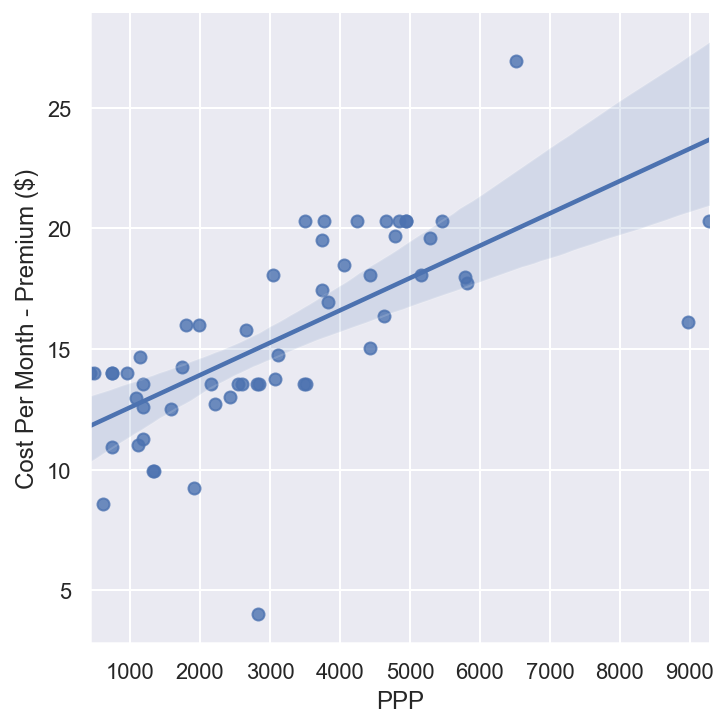

In [267]:
sns.lmplot(x="PPP", y="Cost Per Month - Premium ($)", data=corr_data)
plt.show()

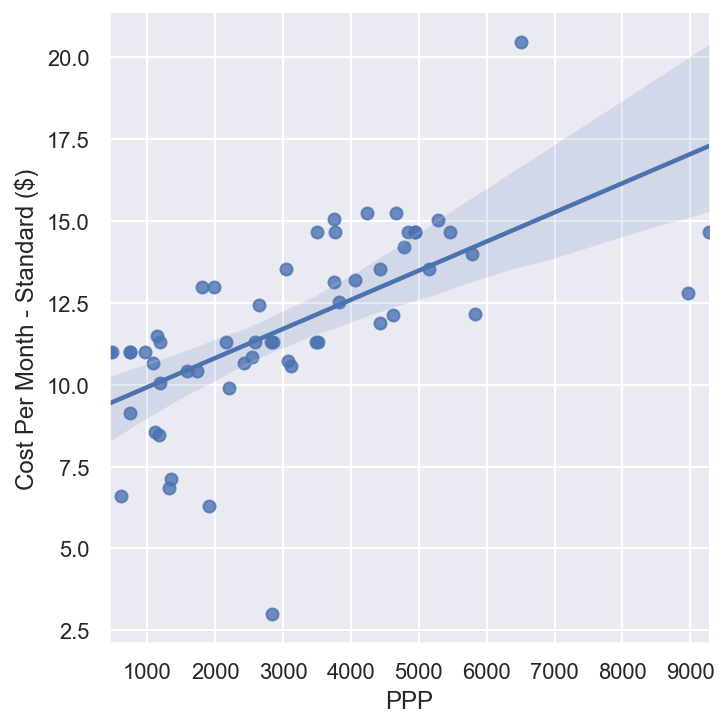

In [268]:
sns.lmplot(x = "PPP", y = "Cost Per Month - Standard ($)", data=corr_data)
plt.show()

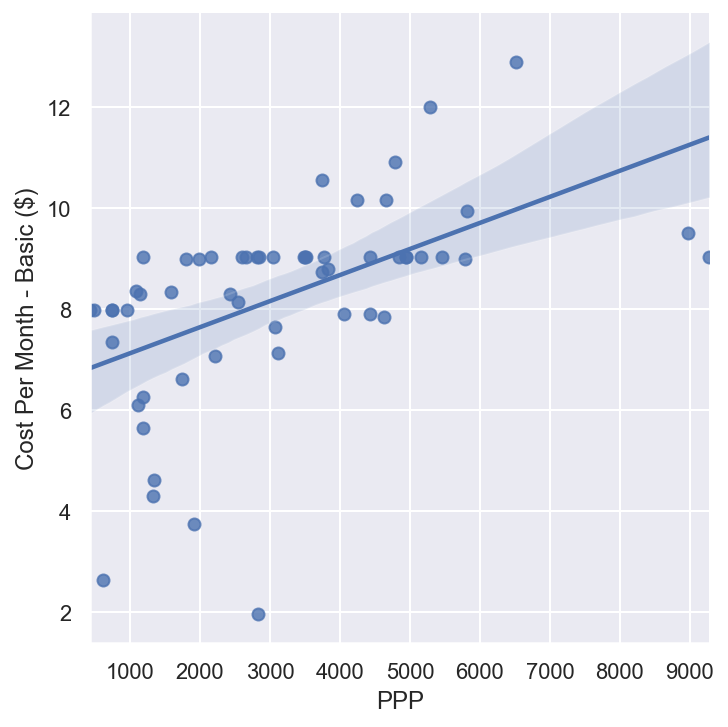

In [269]:
sns.lmplot(x = "PPP", y = "Cost Per Month - Basic ($)", data=corr_data)
plt.show()

# Ответить на следующие вопросы

### 1.Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

Подгрузим данные о странах и их валюты.

In [95]:
curr = pd.read_html("https://publications.europa.eu/code/en/en-5000700.htm", header = 1)[0]
curr = curr.rename(columns = {list(curr)[0]: 'Code', 'Country/territory': 'Country'})
curr

,Code,Country,Currency
0,AED,United Arab Emirates,UAE dirham
1,AFN,Afghanistan,afghani
2,ALL,Albania,lek
3,AMD,Armenia,dram (inv.)
4,ANG (2),Curaçao,Netherlands Antillean guilder (2)
...,...,...,...
250,ZAR,Namibia (*),rand
251,ZAR,South Africa,rand
252,ZMW,Zambia,Zambian kwacha (inv.)
253,ZWL,Zimbabwe,Zimbabwe dollar


In [101]:
curr_mean = pd.merge(data, curr, how = "inner", on = "Country")
curr_mean.groupby(by = ['Code', 'Currency']).mean().iloc[:,3:]

,,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Code,Currency,,,
ARS,Argentine peso,3.74,6.30,9.26
AUD,Australian dollar,7.84,12.12,16.39
BGN,lev (pl. leva),9.03,11.29,13.54
BOB,boliviano,7.99,10.99,13.99
BRL,real (pl. reais),4.61,7.11,9.96
CAD,Canadian dollar,7.91,11.87,15.03
CHF,Swiss franc,12.88,20.46,26.96
CLP,Chilean peso,7.07,9.91,12.74
COP,Colombian peso,4.31,6.86,9.93


###  2. Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [130]:
continents = pd.read_html('https://gist.github.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c')[0]
continents['Two_Letter_Country_Code'] = continents['Two_Letter_Country_Code'].str.lower()

In [152]:
continents

,Unnamed: 0,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,NaN,Asia,AS,"Afghanistan, Islamic Republic of",af,AFG,4.0
1,NaN,Europe,EU,"Albania, Republic of",al,ALB,8.0
2,NaN,Antarctica,AN,Antarctica (the territory South of 60 deg S),aq,ATA,10.0
3,NaN,Africa,AF,"Algeria, People's Democratic Republic of",dz,DZA,12.0
4,NaN,Oceania,OC,American Samoa,as,ASM,16.0
...,...,...,...,...,...,...,...
257,NaN,Africa,AF,"Zambia, Republic of",zm,ZMB,894.0
258,NaN,Oceania,OC,Disputed Territory,xx,NaN,NaN
259,NaN,Asia,AS,Iraq-Saudi Arabia Neutral Zone,xe,NaN,NaN
260,NaN,Asia,AS,United Nations Neutral Zone,xd,NaN,NaN


In [156]:
continents_join = pd.merge(data, continents, how = "inner", left_on = "Country_code", right_on = "Two_Letter_Country_Code")
continents_join[['Continent_Name', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']].groupby(by = 'Continent_Name').mean()


,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent_Name,,,
Africa,6.26,10.05,12.58
Asia,7.67,10.44,13.01
Europe,9.02,13.01,17.16
North America,8.08,11.88,15.20
Oceania,8.32,12.32,16.66
South America,6.71,9.62,12.55


### 3. Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [200]:
ppp_cz = df_ppp[df_ppp['Country'] == 'Czech Republic']['PPP'].values[0]
ppp_cz

3642.805083333333

In [207]:
ppp_names = {'Cost Per Month - Basic ($)': 'Cost Per Month - Basic (% of PPP per month)',
          'Cost Per Month - Standard ($)': 'Cost Per Month - Standart (% of PPP per month)',
           'Cost Per Month - Premium ($)': 'Cost Per Month - Premium (% of PPP per month)'
          }

In [208]:
data[data['Country_code'] == 'cz'][['Cost Per Month - Basic ($)', 
                                   'Cost Per Month - Standard ($)', 
                                   'Cost Per Month - Premium ($)']].divide((ppp_cz)*0.01).rename(columns = ppp_names)

,Cost Per Month - Basic (% of PPP per month),Cost Per Month - Standart (% of PPP per month),Cost Per Month - Premium (% of PPP per month)
12,0.24,0.32,0.39


### 4. Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [217]:
data.sort_values(by = 'No. of TV Shows', ascending = False).head(5)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15
51,sk,Slovakia,7035,5055,1980,9.03,11.29,13.54
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54
24,hu,Hungary,6884,4802,2082,7.64,10.71,13.78
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48


### 5. Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [219]:
ppp_rus = df_ppp[df_ppp['Country'] == 'Russia']['PPP'].values[0]
ppp_rus

2535.9344166666665

In [220]:
data[data['Country_code'] == 'ru'][['Cost Per Month - Basic ($)', 
                                   'Cost Per Month - Standard ($)', 
                                   'Cost Per Month - Premium ($)']].divide((ppp_rus)*0.01).rename(columns = ppp_names)

,Cost Per Month - Basic (% of PPP per month),Cost Per Month - Standart (% of PPP per month),Cost Per Month - Premium (% of PPP per month)
48,0.32,0.43,0.53


### 6. На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

Будем считать, что эффективность подписки - это средняя цена подписки на один фильм (цена/размер библиотеки). Цена не влияет на число доступных фильмов.

In [249]:
rate = data[['Country', 'Total Library Size', 'Cost Per Month - Basic ($)']]
rate

,Country,Total Library Size,Cost Per Month - Basic ($)
0,Argentina,4760,3.74
1,Australia,6114,7.84
2,Austria,5640,9.03
3,Belgium,4990,10.16
4,Bolivia,4991,7.99
...,...,...,...
60,Ukraine,5336,5.64
61,United Kingdom,6643,7.91
62,United States,5818,8.99
63,Uruguay,4989,8.99


In [250]:
rate['Cost Per Title'] = rate['Cost Per Month - Basic ($)']/rate['Total Library Size']

<ipython-input-250-7cbf7bb2717d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate['Cost Per Title'] = rate['Cost Per Month - Basic ($)']/rate['Total Library Size']


In [251]:
rate

,Country,Total Library Size,Cost Per Month - Basic ($),Cost Per Title
0,Argentina,4760,3.74,7.86e-04
1,Australia,6114,7.84,1.28e-03
2,Austria,5640,9.03,1.60e-03
3,Belgium,4990,10.16,2.04e-03
4,Bolivia,4991,7.99,1.60e-03
...,...,...,...,...
60,Ukraine,5336,5.64,1.06e-03
61,United Kingdom,6643,7.91,1.19e-03
62,United States,5818,8.99,1.55e-03
63,Uruguay,4989,8.99,1.80e-03


In [256]:
rate.loc[rate.sort_values(by = 'Cost Per Title')['Country'] == 'Russia']

,Country,Total Library Size,Cost Per Month - Basic ($),Cost Per Title
48,Russia,5711,8.13,1.42e-03


Следовательно, Россия будет на 48 месте

### 7. В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

Для этой страны должны быть наименьшими Cost Per Month - Basic ($) и Cost Per Title

In [266]:
rate.sort_values(by = ['Cost Per Month - Basic ($)', 'Cost Per Title']).head(1)

,Country,Total Library Size,Cost Per Month - Basic ($),Cost Per Title
59,Turkey,4639,1.97,4.25e-04


Видим, что эта страна - Турция.